In [2]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Question 4

In [3]:
data = [(1, .98), (0, .92), (1, .85), (0, .77), (0, .71), (1, .64), (1, .5), (1, .39), (0, .34), (0, .31)]

neg = pos = 5

# [[thresh, TP, FP, TN, FN], ...]
out = []
for i in range(len(data)):
    tp = fp = tn = fn = 0
    thresh = data[i][1]
    for n in range(len(data)):
        if data[n][1] >= thresh:
            if data[n][0] == 1: tp += 1
            else: fp += 1
        else:
            if data[n][0] == 0: tn += 1
            else: fn += 1
    out += [[thresh, tp, fp, tn, fn]]
    
# [[thresh, TPR, FPR, acc], ...]
out2 = []
for i in range(len(data)):
    acc = (out[i][1] + out[i][3]) / len(data)
    tpr = out[i][1] / pos
    fpr = out[i][2] / pos
    
    out2 += [[out[i][0], acc, tpr, fpr]]
    
out2 = pd.DataFrame(out2, columns=['Threshold', 'Accuracy', 'True Pos Rate', 'False Pos Rate'], 
                    index= ['' for i in range(10)])
display(out2)


,Threshold,Accuracy,True Pos Rate,False Pos Rate
,0.98,0.6,0.2,0.0
,0.92,0.5,0.2,0.2
,0.85,0.6,0.4,0.2
,0.77,0.5,0.4,0.4
,0.71,0.4,0.4,0.6
,0.64,0.5,0.6,0.6
,0.50,0.6,0.8,0.6
,0.39,0.7,1.0,0.6
,0.34,0.6,1.0,0.8
,0.31,0.5,1.0,1.0


## Question 5
### ROC Curve

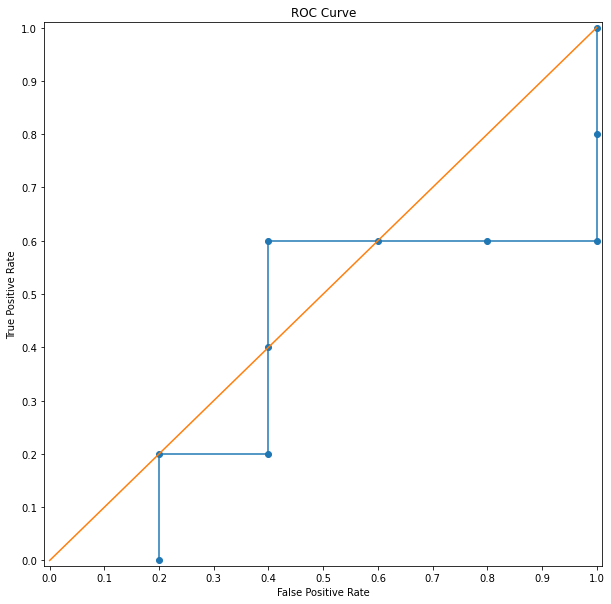

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(out2['True Pos Rate'], out2['False Pos Rate'])

plt.plot(out2['True Pos Rate'], out2['False Pos Rate'])
plt.plot([0,1], [0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xticks([.1 * i for i in range(11)])
plt.yticks([.1 * i for i in range(11)])
plt.title('ROC Curve')
plt.margins(x=.01, y=0.01)

plt.show()

## Question 6
### Part A

In [5]:
# Import Data
data = pd.read_csv("spam.csv")
data = data.drop(['isuid', 'id', 'domain', 'spampct', 'category', 'cappct'], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'spam.csv'

### Part B
#### i.

In [ ]:
spamCount = 0
for i in data['spam']:
    if i == 'yes': spamCount += 1
        
print("%.2f%% of emails are spam." % (100*spamCount/len(data['spam'])))

#### ii.
The constant classifier will predict that 100% of emails are spam.
#### iii.
The constant classifier will have an error rate of 67.30%.

### Part C

In [ ]:
# Split Data into training and test groups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree

enc = OrdinalEncoder()
enc.fit(data)
ord_data = pd.DataFrame(enc.transform(data))

data_train, data_test, spam_train, spam_test = train_test_split(ord_data.iloc[:, 0:14], ord_data[14], test_size=0.2, train_size=0.8, random_state=124)

### Part D

In [ ]:
# Display Decision Tree
import graphviz

out = tree.DecisionTreeClassifier()
out = out.fit(data_train, spam_train)
tree_graph = tree.export_graphviz(out, out_file=None,
                                 feature_names=data.iloc[:, 0:14].columns,
                                 filled = True, rounded=True,
                                 special_characters = True)
tree_graph = graphviz.Source(tree_graph)
tree_graph

### Part E
    Gini value is the default selection criteria when learning the tree.
### Part F

In [ ]:
from sklearn import metrics
#Accuracy = TP + TN / n
#Sensitivity = TP / TP + FN
#Specificity = TN / FP + TN
#AUC
predicted_train = out.predict(data_train)
predicted_test = out.predict(data_test)

matrix_train = metrics.confusion_matrix(spam_train, predicted_train)
matrix_test = metrics.confusion_matrix(spam_test, predicted_test)

acc_train = (matrix_train[1][1] + matrix_train[0][0]) / len(spam_train)
sens_train = matrix_train[1][1] / (matrix_train[1][1] + matrix_train[1][0])
spec_train = matrix_train[0][0] / (matrix_train[0][0] + matrix_train[0][1])
auc_train = metrics.roc_auc_score(spam_train, predicted_train)

acc_test = (matrix_test[1][1] + matrix_test[0][0]) / len(spam_test)
sens_test = matrix_test[1][1] / (matrix_test[1][1] + matrix_test[1][0])
spec_test = matrix_test[0][0] / (matrix_test[0][0] + matrix_test[0][1])
auc_test = metrics.roc_auc_score(spam_test, predicted_test)

performance_full = pd.DataFrame([[acc_train, sens_train, spec_train, auc_train],
                                 [acc_test, sens_test, spec_test, auc_test]],
                               columns = ['Accuracy', 'Sensitivity', 'Specificity', 'AUC'],
                               index = ['Training Data', 'Testing Data'])
performance_full

### Part G

In [ ]:
out = tree.DecisionTreeClassifier(max_depth=4)
out = out.fit(data_train, spam_train)
tree_graph = tree.export_graphviz(out, out_file=None,
                                 feature_names=data.iloc[:, 0:14].columns,
                                 filled = True, rounded=True,
                                 special_characters = True)
tree_graph = graphviz.Source(tree_graph)
tree_graph

In [ ]:
predicted_train = out.predict(data_train)
predicted_test = out.predict(data_test)

matrix_train = metrics.confusion_matrix(spam_train, predicted_train)
matrix_test = metrics.confusion_matrix(spam_test, predicted_test)

acc_train = (matrix_train[1][1] + matrix_train[0][0]) / len(spam_train)
sens_train = matrix_train[1][1] / (matrix_train[1][1] + matrix_train[1][0])
spec_train = matrix_train[0][0] / (matrix_train[0][0] + matrix_train[0][1])
auc_train = metrics.roc_auc_score(spam_train, predicted_train)

acc_test = (matrix_test[1][1] + matrix_test[0][0]) / len(spam_test)
sens_test = matrix_test[1][1] / (matrix_test[1][1] + matrix_test[1][0])
spec_test = matrix_test[0][0] / (matrix_test[0][0] + matrix_test[0][1])
auc_test = metrics.roc_auc_score(spam_test, predicted_test)

performance_trim = pd.DataFrame([[acc_train, sens_train, spec_train, auc_train],
                                 [acc_test, sens_test, spec_test, auc_test]],
                               columns = ['Accuracy', 'Sensitivity', 'Specificity', 'AUC'],
                               index = ['Training Data', 'Testing Data'])
performance_trim

## Question 7: 

a)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import pandas as pd
import numpy as np

In [ ]:
def spec_test(y, y_pred):
    if(len(y) != len(y_pred)):
        print( "Error in spec_score")
        exit(-1)
    fp = 0.
    tn = 0.
    for i in range(len(y_pred)):
        if y_pred[i] == 0 and y[i] == 0:
            tn += 1
        elif y_pred[i] == 1 and y[i] == 0:
            fp += 1
    
    return tn / (fp + tn)

In [ ]:
import csv

spam = []
with open('spam.csv') as csv_file:
    spam_file = csv.reader(csv_file, delimiter=',')
    linenum = 0;
    for row in spam_file:
        if(linenum != 0):
            spam.append(row)
        linenum += 1


#Transform Data to numeric type
enc = OrdinalEncoder()
enc.fit(spam)
t_spam = enc.transform(spam)

#Scale Data [0, 1]
scaler = MinMaxScaler()
scaler.fit(t_spam)
s_spam = scaler.transform(t_spam)

#Split data and target vector
y = np.array(s_spam.T[len(s_spam[0]) - 1]) #target vector
x = np.delete(s_spam, len(s_spam[0]) - 1, 1) #data


skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(x, y)

train_data = []
test_data = []
for train_i, test_i in skf.split(x, y):
    x_train, x_test = x[train_i], x[test_i]
    y_train, y_test = y[train_i], y[test_i]
    train_data.append((x_train, y_train))
    test_data.append((x_test, y_test))

b)

In [ ]:

model_array = [ KNeighborsClassifier(n_neighbors = 3), 
                KNeighborsClassifier(n_neighbors = 7),
                KNeighborsClassifier(n_neighbors = 11),
                KNeighborsClassifier(n_neighbors = 15),
                DecisionTreeClassifier(max_depth = 5),
                DecisionTreeClassifier(criterion = "entropy", max_depth = 100, min_samples_split = 25),
                GaussianNB()]

for model in model_array:
    print(model)
    total_accuracy = 0.
    total_auc = 0.
    total_recall = 0.
    total_spec = 0.
    split_stats = []
    for i in range(len(train_data)):
        model.fit(train_data[i][0], train_data[i][1])
        y_pred = model.predict(test_data[i][0])
        
        acc_score = metrics.accuracy_score(test_data[i][1], y_pred)
        auc_score = metrics.roc_auc_score(test_data[i][1], y_pred)
        recall_score = metrics.recall_score(test_data[i][1], y_pred)
        spec_score = spec_test(test_data[i][1], y_pred)
        
        total_accuracy += acc_score
        total_auc += auc_score
        total_recall += recall_score
        total_spec += spec_score
        
        split_stats.append([acc_score, auc_score, recall_score, spec_score])
    

    split_stats.append([total_accuracy / 10, total_auc / 10 , total_recall / 10, total_spec / 10])
    display(pd.DataFrame(split_stats,
                  columns = ['Accuracy', 'AUC', 'Recall', 'Specificity'],
                  index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'Averages']))

    